# II. Data Cleaning/Feature Exploration

In [1]:
# import libraries
from sportsreference.ncaab.teams import Teams
from sportsreference.ncaab.roster import Player
from sportsreference.ncaab.roster import Roster

import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
# importing Data
df = pd.read_csv('Data/NCAA_Stats',index_col=0)

In [3]:
# print head of df
df.head()

,player_id,name,team_abbreviation,points,total_rebounds,assists,blocks,field_goals,field_goal_attempts,free_throws,...,personal_fouls,steals,three_pointers,two_pointers,weight,height,position,year,true_shooting_percentage,target
0,ryan-teets-1,ryan teets,air-force,50.0,31.0,12.0,1.0,16.0,32.0,14.0,...,34.0,8.0,4.0,12.0,200.0,6-6,Forward,2007,0.564,0
2,anwar-johnson-1,anwar johnson,air-force,656.0,249.0,162.0,12.0,208.0,458.0,233.0,...,216.0,65.0,7.0,201.0,200.0,6-5,Guard,2009,0.524,0
3,eric-kenzik-1,eric kenzik,air-force,136.0,87.0,32.0,5.0,49.0,107.0,29.0,...,69.0,11.0,9.0,40.0,220.0,6-9,Forward,2008,0.532,0
5,selwyn-mansell-1,selwyn mansell,air-force,69.0,15.0,35.0,0.0,17.0,53.0,29.0,...,48.0,21.0,6.0,11.0,160.0,5-11,Guard,2002,0.479,0
8,kyle-broekhuis-1,kyle broekhuis,air-force,115.0,114.0,28.0,5.0,37.0,105.0,31.0,...,63.0,9.0,10.0,27.0,200.0,6-7,Forward,2017,0.453,0


In [4]:
# Check count of missing data
df.isna().sum()

player_id                      0
name                           0
team_abbreviation             26
points                         0
total_rebounds                 0
assists                        0
blocks                         0
field_goals                    0
field_goal_attempts            0
free_throws                    0
free_throw_attempts            0
games_played                   0
games_started                  8
minutes_played               681
personal_fouls               138
steals                         0
three_pointers                 0
two_pointers                   0
weight                      1221
height                       147
position                      34
year                           0
true_shooting_percentage     359
target                         0
dtype: int64

### Position

In [5]:
# Print unique values
df.position.unique()

array(['Forward', 'Guard', 'Center', nan, 'Forward RSCI', 'Center RSCI',
       'Guard RSCI', 'D'], dtype=object)

It looks like players are labeled into 3 main position 'Guard' / 'Forward' / 'Center'. 

There also seems to be Forward RSCI' / 'Center RSCI' / 'Guard RSCI'. Which according to SportsReference is ranking system from a 3rd party

"D" position is unknown, I assume it's a typo

In [6]:
df.loc[(df.position == 'Forward RSCI')|(df.position == 'GuardForward')|(df.position == 'Guard RSCI')|(df.position == 'Center RSCI')|(df.position == 'ForwardCenter')].head()

,player_id,name,team_abbreviation,points,total_rebounds,assists,blocks,field_goals,field_goal_attempts,free_throws,...,personal_fouls,steals,three_pointers,two_pointers,weight,height,position,year,true_shooting_percentage,target
1387,roman-brown-1,roman brown,arkansas-little-rock,31.0,44.0,6.0,19.0,14.0,25.0,3.0,...,49.0,1.0,0.0,14.0,NaN,NaN,Forward RSCI,2000,0.538,0
1423,rodrick-nealy-1,rodrick nealy,baylor,79.0,55.0,7.0,0.0,26.0,68.0,18.0,...,26.0,5.0,9.0,17.0,NaN,NaN,Forward RSCI,2002,0.495,0
1429,troy-moore-1,troy moore,arkansas-little-rock,238.0,163.0,11.0,16.0,87.0,160.0,64.0,...,93.0,10.0,0.0,87.0,NaN,NaN,Forward RSCI,2000,0.572,0
1946,adam-glosier-1,adam glosier,army,131.0,179.0,17.0,15.0,54.0,146.0,23.0,...,NaN,41.0,0.0,54.0,NaN,NaN,Center RSCI,2000,0.388,0
1990,david-hamilton-1,david hamilton,auburn,144.0,126.0,7.0,10.0,67.0,133.0,10.0,...,61.0,15.0,0.0,67.0,NaN,NaN,Forward RSCI,2000,0.474,0


In [7]:
# Drop rows with position 'Forward RSCI','GuardForward','Guard RSCI','Center RSCI','ForwardCenter','D'

index_drop = df.loc[(df.position == 'Forward RSCI')|(df.position == 'GuardForward')|(df.position == 'Guard RSCI')|(df.position == 'Center RSCI')|(df.position == 'ForwardCenter')|(df.position == "D")].index

df.drop(index_drop,inplace=True)

In [8]:
df.loc[df.position =="D"]

,player_id,name,team_abbreviation,points,total_rebounds,assists,blocks,field_goals,field_goal_attempts,free_throws,...,personal_fouls,steals,three_pointers,two_pointers,weight,height,position,year,true_shooting_percentage,target


### Height

In [9]:
# Unique values of height

df.height.unique()

array(['6-6', '6-5', '6-9', '5-11', '6-7', '6-8', '6-3', '6-4', '6-1',
       '6-2', '6-0', '6-10', '6-11', '5-9', '5-10', '5-7', '7-0', '7-1',
       '5-8', '5-6', nan, '7-2', '7-6', '7-3', '7-4', '5-4', '5-5', '5-3',
       '7-5', '7-7'], dtype=object)

In [10]:
# check on NaN height values

df[df.height.isna()].head()

,player_id,name,team_abbreviation,points,total_rebounds,assists,blocks,field_goals,field_goal_attempts,free_throws,...,personal_fouls,steals,three_pointers,two_pointers,weight,height,position,year,true_shooting_percentage,target
1038,nick-boyd-1,nick boyd,american,205.0,85.0,22.0,8.0,66.0,168.0,32.0,...,40.0,17.0,41.0,25.0,220.0,NaN,Guard,2002,0.550,0
1103,josh-hare-1,josh hare,samford,454.0,209.0,87.0,3.0,168.0,397.0,80.0,...,161.0,28.0,38.0,130.0,227.0,NaN,Forward,2005,0.501,0
1404,laverne-smith-1,laverne smith,arkansas-little-rock,803.0,144.0,100.0,3.0,289.0,644.0,136.0,...,112.0,52.0,89.0,200.0,200.0,NaN,Guard,2001,0.553,0
1474,alex-finger-1,alex finger,arkansas-little-rock,114.0,86.0,96.0,4.0,31.0,80.0,39.0,...,103.0,47.0,13.0,18.0,185.0,NaN,Guard,2001,0.544,0
1588,charlton-gulley-1,charlton gulley,arkansas-pine-bluff,43.0,17.0,16.0,1.0,16.0,53.0,2.0,...,16.0,10.0,9.0,7.0,160.0,NaN,NaN,2007,0.388,0


In [11]:
# function to convert feet to inches

def feet_to_inches(feet):
    """
    convert feet to inches
    """
    #split string height by '-' (eg. '6-1' - ['6','1']
    try:
        x = feet.split('-')
        return int(int(x[0]) * 12) + int(x[1])
    except:
        return np.NaN

In [12]:
# convert orginal height(str) to float

df['height'] = df['height'].map(feet_to_inches)

In [13]:
# Print # of missing values

print('# of NaN : {}'.format(df['height'].isna().sum()))

# of NaN : 111


Using a players position I imputed the average height of labeled position to the NaNs

In [14]:
# imputing height for Guards to the mean height of all guards

df.loc[np.logical_and(df['height'].isna(), df['position'] == 'Guard'),'height'] = round(np.mean(df[df.position == 'Guard'].height))

In [15]:
# imputing height for Forward to the mean height of all Forwards

df.loc[np.logical_and(df['height'].isna(), df['position'] == 'Forward'),'height'] = round(np.mean(df[df.position == 'Forward'].height))

In [16]:
# imputing height for Center to the mean height of all Centers

df.loc[np.logical_and(df['height'].isna(), df['position'] == 'Center'),'height'] = round(np.mean(df[df.position == 'Center'].height))

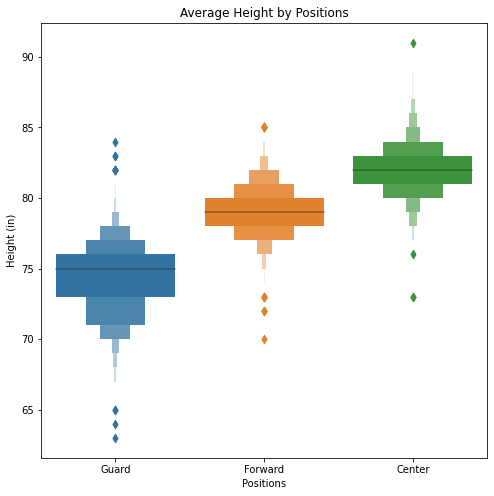

In [17]:
# boxplot of heigth grouped by position

plt.figure(figsize=(8,8))
sns.boxenplot(x='position',y='height',data=df,order=['Guard','Forward','Center'])
plt.title('Average Height by Positions')
plt.xlabel("Positions")
plt.ylabel("Height (in)");

There seems to be this consensus amongst DIII and DII basketball players that the only reason they are not playing DI is due to uncontrollable factors like height and weight. Although, I personally disagree its a interesting idea. So I decided to check if its the same for draftd players vs those that aren't. 

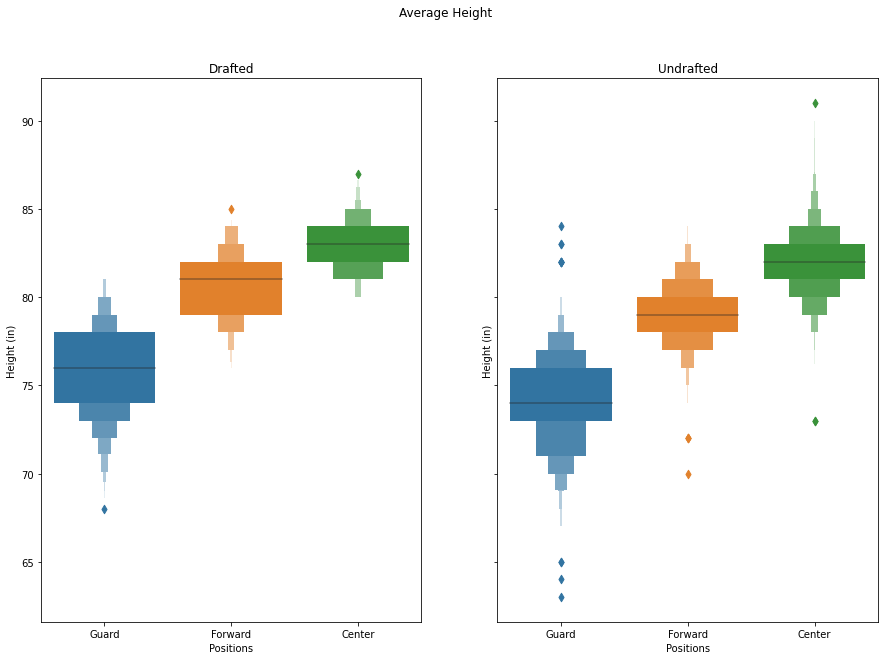

In [18]:
# Compareing the height of those Drafted vs Undrafted Players

fig, (ax,ax1) = plt.subplots(ncols = 2,figsize=(15,10),sharey=True)

sns.boxenplot(x='position',y='height',data=df[df.target == 1],ax=ax,order=['Guard','Forward','Center'])
ax.set_title('Drafted')
ax.set_xlabel("Positions")
ax.set_ylabel("Height (in)")

sns.boxenplot(x='position',y='height',data=df[df.target == 0],ax=ax1,order=['Guard','Forward','Center'])
ax1.set_title('Undrafted')
ax1.set_xlabel("Positions")
ax1.set_ylabel("Height (in)")

plt.suptitle('Average Height');

In [19]:
#Average height of players that were Drafted
df[df.target == 1].groupby('position')['height'].mean()

position
Center     82.938776
Forward    80.590504
Guard      75.855385
Name: height, dtype: float64

In [20]:
#Average height of players that were Undrafted
df[df.target == 0].groupby('position')['height'].mean()

position
Center     81.887090
Forward    79.191933
Guard      74.300017
Name: height, dtype: float64

Although this does align with the idea that height plays a role in playing in the next level this isnt enough evidence to confidently claim being taller allows you to play in the next level but it is an interesting stat to explore upon.

### Weight

In [21]:
# Unique values of Weight
df.weight.unique()

array([200., 220., 160., 215., 212.,  nan, 180., 205., 175., 185., 184.,
       235., 240., 245., 190., 225., 198., 170., 193., 195., 206., 183.,
       197., 189., 182., 177., 210., 187., 165., 207., 194., 230., 290.,
       255., 216., 209., 155., 214., 236., 150., 217., 208., 260., 250.,
       228., 241., 231., 265., 219., 280., 213., 181., 270., 186., 226.,
       221., 191., 168., 218., 223., 227., 275., 224., 173., 285., 222.,
       178., 203., 172., 243., 238., 188., 248., 232., 196., 192., 253.,
       242., 229., 257., 201., 204., 249., 199., 179., 237., 247., 266.,
       239., 202., 166., 256., 244., 174., 145., 262., 171., 167., 158.,
       176., 163., 162., 246., 164., 268., 278., 211., 274., 269., 234.,
       233., 310., 251., 263., 300., 258., 252., 276., 254., 264., 261.,
       295., 169., 320., 156., 325., 101., 157., 267., 340., 142., 259.,
       161., 288., 305., 134., 315., 282., 327., 308., 322., 292., 330.,
       298., 152., 273., 283., 350., 294., 159., 33

In [22]:
df[df.weight.isna()] # 1185 missing rows

,player_id,name,team_abbreviation,points,total_rebounds,assists,blocks,field_goals,field_goal_attempts,free_throws,...,personal_fouls,steals,three_pointers,two_pointers,weight,height,position,year,true_shooting_percentage,target
20,billy-humphrey-1,billy humphrey,air-force,537.0,432.0,78.0,13.0,192.0,529.0,137.0,...,200.0,41.0,16.0,176.0,NaN,78.0,Forward,2000,0.422,0
44,tyron-wright-1,tyron wright,air-force,859.0,281.0,123.0,6.0,277.0,706.0,259.0,...,96.0,97.0,46.0,231.0,NaN,78.0,Guard,2000,0.485,0
58,jaron-roux-1,jaron roux,air-force,26.0,16.0,15.0,1.0,8.0,17.0,6.0,...,29.0,5.0,4.0,4.0,NaN,72.0,Guard,2000,0.573,0
84,lawrence-yazzie-1,lawrence yazzie,air-force,324.0,63.0,39.0,2.0,105.0,292.0,39.0,...,88.0,19.0,75.0,30.0,NaN,72.0,Guard,2000,0.511,0
99,miguel-garcia-1,miguel garcia,air-force,493.0,376.0,166.0,48.0,168.0,424.0,111.0,...,173.0,102.0,46.0,122.0,NaN,79.0,Forward,2000,0.489,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28279,cody-waddey-1,cody waddey,tennessee-state,22.0,10.0,7.0,0.0,6.0,16.0,9.0,...,11.0,9.0,1.0,5.0,NaN,82.0,Center,2007,0.448,0
28293,king-eric-1,king eric,tennessee-state,321.0,203.0,50.0,32.0,129.0,266.0,61.0,...,NaN,26.0,2.0,127.0,NaN,79.0,Forward,2005,0.525,0
28300,antonio-cook-1,antonio cook,tennessee-state,43.0,25.0,14.0,6.0,16.0,48.0,9.0,...,NaN,5.0,2.0,14.0,NaN,77.0,Forward,2003,0.393,0
28771,cori-gaither-1,cori gaither,texas-pan-american,64.0,67.0,12.0,4.0,21.0,58.0,17.0,...,NaN,11.0,5.0,16.0,NaN,77.0,Forward,2006,0.455,0


In [23]:
# imputing height for Guards to the mean height of all guards #189 lb

df.loc[np.logical_and(df['weight'].isna(), df['position'] == 'Guard'),'weight'] = round(np.mean(df[df.position == 'Guard'].weight))

In [24]:
# imputing height for Guards to the mean height of all guards #221 lb

df.loc[np.logical_and(df['weight'].isna(), df['position'] == 'Forward'),'weight'] = round(np.mean(df[df.position == 'Forward'].weight))

In [25]:
# imputing height for Guards to the mean height of all guards #243 lb

df.loc[np.logical_and(df['weight'].isna(), df['position'] == 'Center'),'weight'] = round(np.mean(df[df.position == 'Center'].weight))

In [26]:
# Average weight by Position

df.groupby('position')['weight'].mean()

position
Center     243.096517
Forward    221.004967
Guard      188.715719
Name: weight, dtype: float64

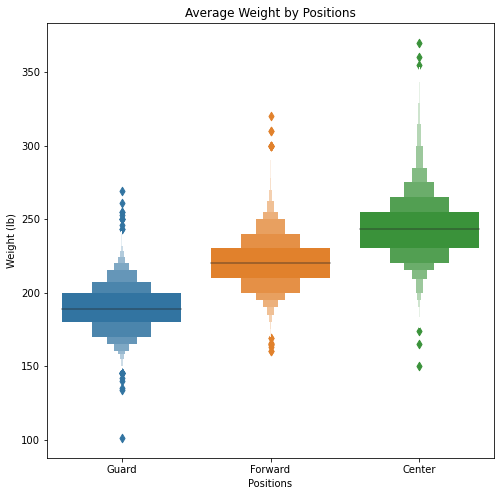

In [27]:
# Boxplot of weight by position

plt.figure(figsize=(8,8))
sns.boxenplot(x='position',y='weight',data=df,order=['Guard','Forward','Center'])
plt.title('Average Weight by Positions')
plt.xlabel("Positions")
plt.ylabel("Weight (lb)");

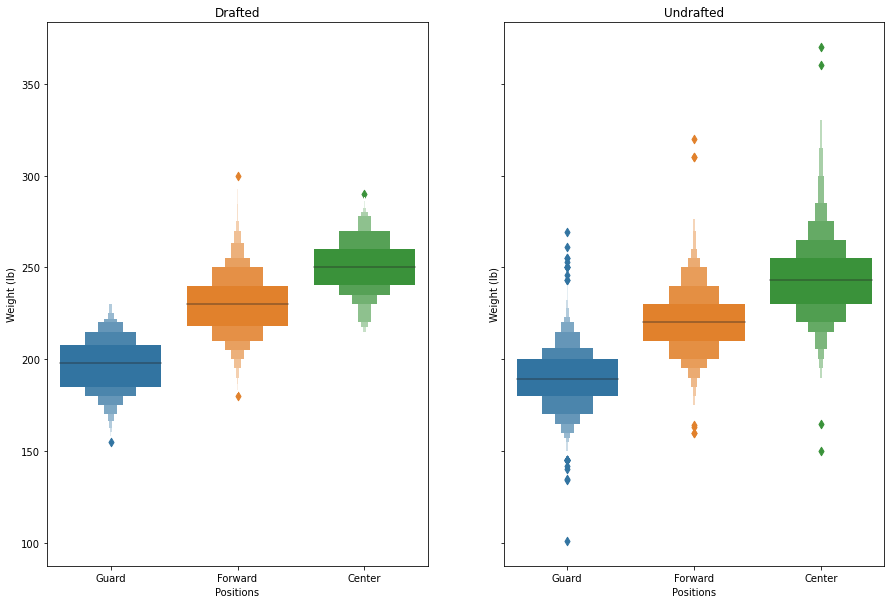

In [28]:
fig, (ax,ax1) = plt.subplots(ncols = 2,figsize=(15,10),sharey=True)

sns.boxenplot(x='position',y='weight',data=df[df.target == 1],ax=ax,order=['Guard','Forward','Center'])
ax.set_title('Drafted')
ax.set_xlabel("Positions")
ax.set_ylabel("Weight (lb)")

sns.boxenplot(x='position',y='weight',data=df[df.target == 0],ax=ax1,order=['Guard','Forward','Center'])
ax1.set_title('Undrafted')
ax1.set_xlabel("Positions")
ax1.set_ylabel("Weight (lb)");

In [29]:
#Average height of players that were Drafted

df[df.target == 1].groupby('position')['weight'].mean()

position
Center     250.244898
Forward    229.308605
Guard      197.095385
Name: weight, dtype: float64

In [30]:
#Average height of players that were Undyo irafted

df[df.target == 0].groupby('position')['weight'].mean()

position
Center     242.789934
Forward    220.691429
Guard      188.489448
Name: weight, dtype: float64

Similarly Weight seems to follow the same trend as height in the regards that drafted players, on average, weight more than those that are undrafted.

### Position

In [31]:
# # of missing values

df.position.isna().sum()

34

In [32]:
# unique values

df.position.unique()

array(['Forward', 'Guard', 'Center', nan], dtype=object)

In [33]:
# Finding relationship between position and weight
df.groupby('position')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Center,2383.0,243.096517,21.109962,150.0,230.0,243.0,255.0,370.0
Forward,9262.0,221.004967,17.938460,160.0,210.0,220.0,230.0,320.0
Guard,12361.0,188.715719,15.532858,101.0,180.0,189.0,200.0,269.0


In [34]:
# Finding relationship between position and height
df.groupby('position')['height'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Center,2383.0,81.930340,1.756413,73.0,81.0,82.0,83.0,91.0
Forward,9262.0,79.242820,1.672936,70.0,78.0,79.0,80.0,85.0
Guard,12361.0,74.340911,2.450702,63.0,73.0,75.0,76.0,84.0


Height seems to be a better indicator of a players position. With respect to weight, the standard deivation of players height is lower than players weight. Meaning the players, labeled said poosition, are closer in height than in weight. Hence detereming a players position by height is a better option.

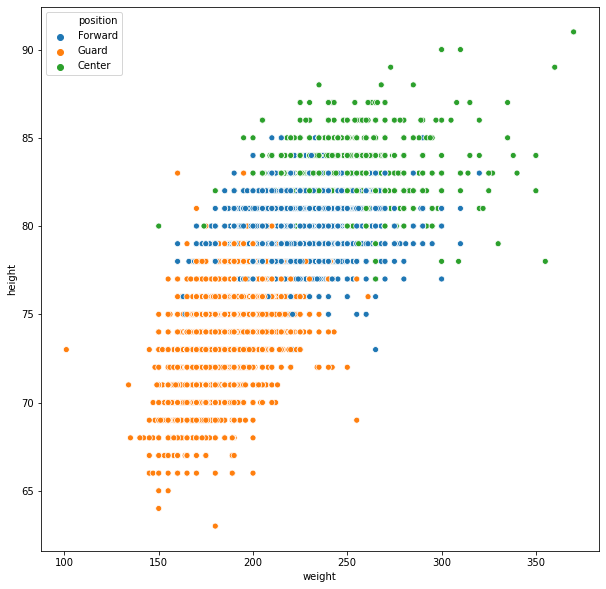

In [35]:
# scatter plot of Height v Weight

plt.figure(figsize=(10,10))
sns.scatterplot(x ='weight',y = 'height',data=df,hue='position');

In [36]:
# function to determine position

def height_to_position(height):
    """
    Takes in height and returns str position('Guard'/'Forward'/'Center')
    
    <76 = "Guard"
    77-80 = "Forward"
    >81 = "Center"
    
    return None if height is NaN
    """
    
    try:
        if height < 76:
            return 'Guard'
        elif height<=80:
            return 'Forward'
        elif height >= 81:
            return 'Center'
    except:
        pass

In [37]:
# test function

height_to_position(np.NAN)

In [38]:
# Impute position using players height

df.loc[df['position'].isna(),'position'] = df.loc[df['position'].isna(),'height'].map(height_to_position)

In [39]:
df.loc[df['position'].isna()].head()

,player_id,name,team_abbreviation,points,total_rebounds,assists,blocks,field_goals,field_goal_attempts,free_throws,...,personal_fouls,steals,three_pointers,two_pointers,weight,height,position,year,true_shooting_percentage,target
1588,charlton-gulley-1,charlton gulley,arkansas-pine-bluff,43.0,17.0,16.0,1.0,16.0,53.0,2.0,...,16.0,10.0,9.0,7.0,160.0,NaN,None,2007,0.388,0
4567,kevin-lee-1,kevin lee,central-florida,281.0,37.0,50.0,3.0,100.0,287.0,28.0,...,55.0,24.0,53.0,47.0,170.0,NaN,None,2001,0.462,0
6099,gerard-barrett-1,gerard barrett,columbia,102.0,91.0,6.0,5.0,33.0,89.0,36.0,...,62.0,12.0,0.0,33.0,225.0,NaN,None,2005,0.432,0
6154,john-michael-grzan-1,john michael grzan,columbia,21.0,25.0,19.0,0.0,7.0,13.0,7.0,...,10.0,10.0,0.0,7.0,185.0,NaN,None,2006,NaN,0
7488,lungi-okoko-1,lungi okoko,howard,26.0,28.0,14.0,1.0,10.0,33.0,3.0,...,NaN,5.0,3.0,7.0,NaN,NaN,None,2000,0.358,0


## Removing NaNs

In [40]:
df.isna().sum()

player_id                     0
name                          0
team_abbreviation            26
points                        0
total_rebounds                0
assists                       0
blocks                        0
field_goals                   0
field_goal_attempts           0
free_throws                   0
free_throw_attempts           0
games_played                  0
games_started                 8
minutes_played              660
personal_fouls              122
steals                        0
three_pointers                0
two_pointers                  0
weight                        2
height                       28
position                     28
year                          0
true_shooting_percentage    359
target                        0
dtype: int64

In [41]:
df.shape

(24040, 24)

In [42]:
df.dropna(inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22942 entries, 0 to 31556
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 22942 non-null  object 
 1   name                      22942 non-null  object 
 2   team_abbreviation         22942 non-null  object 
 3   points                    22942 non-null  float64
 4   total_rebounds            22942 non-null  float64
 5   assists                   22942 non-null  float64
 6   blocks                    22942 non-null  float64
 7   field_goals               22942 non-null  float64
 8   field_goal_attempts       22942 non-null  float64
 9   free_throws               22942 non-null  float64
 10  free_throw_attempts       22942 non-null  float64
 11  games_played              22942 non-null  float64
 12  games_started             22942 non-null  float64
 13  minutes_played            22942 non-null  float64
 14  person

After cleaning up the data we are left with ~23,000 rows of data

# III. Exploratory Data Analysis

In [44]:
# Feature selection

feature_cols = ['player_id','name','points','total_rebounds','assists','blocks','steals','true_shooting_percentage','games_played','games_started','three_pointers','two_pointers','weight','height','position','year','target']

df = df[feature_cols]

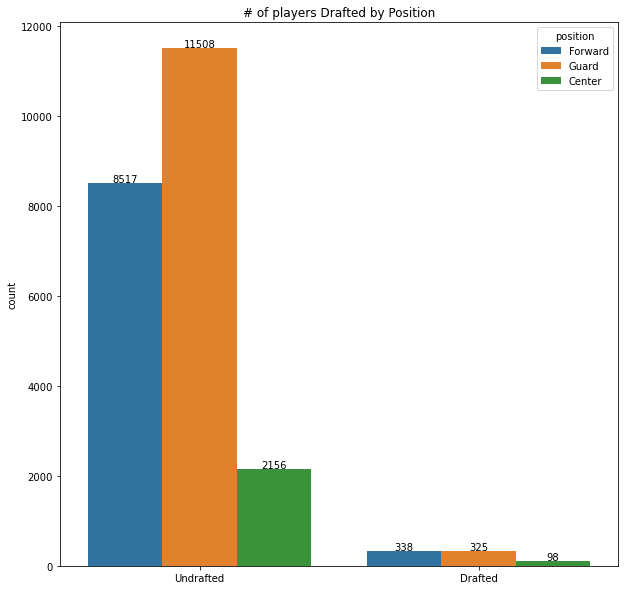

In [45]:
# plot count of players draft on position

plt.figure(figsize=(10,10))
ax = sns.countplot(df.target,hue=df.position)
ax.set_xticklabels(['Undrafted','Drafted'])

plt.xlabel('')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 20,height ,ha="center")
    
ax.set_title("# of players Drafted by Position");

# save png

plt.savefig('Images/playersdraftedbyposition')

In the recent year we witness a shift in the way the NBA games are played out, from big dominant Centers playing under the rim to more of a Guard dominated beyond the arc league. Without even looking at stats we can tell teams are shooting way more threes than ever before. Centers who are able to shoot the three are praised for their unique skill set and those that arent are out of a job. Its adapt with the times or you are let go. It's no surprise that since 2012 Guards and Forwards were drafted 3x more likely than Centers.

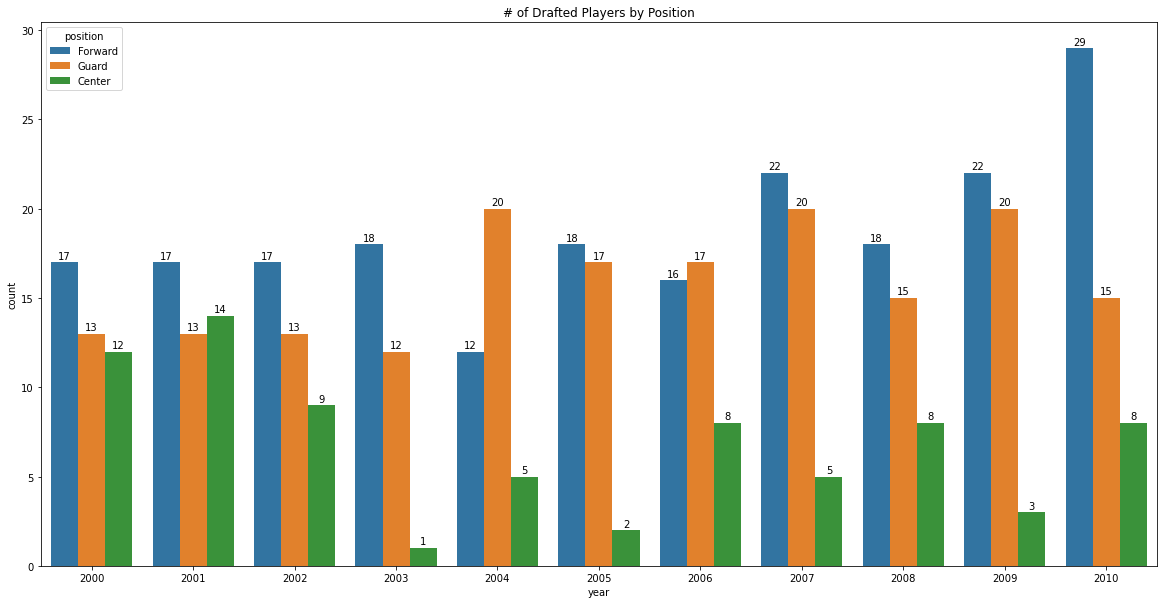

In [46]:
#Countplot of # of player drafted by position ( '00 - '10)


fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x='year',hue='position',data=df[['year','target','position']][(df.target==1)&(df.year >=2000)&(df.year<2011)])
ax.set_title('# of Drafted Players by Position')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .2,height ,ha="center")

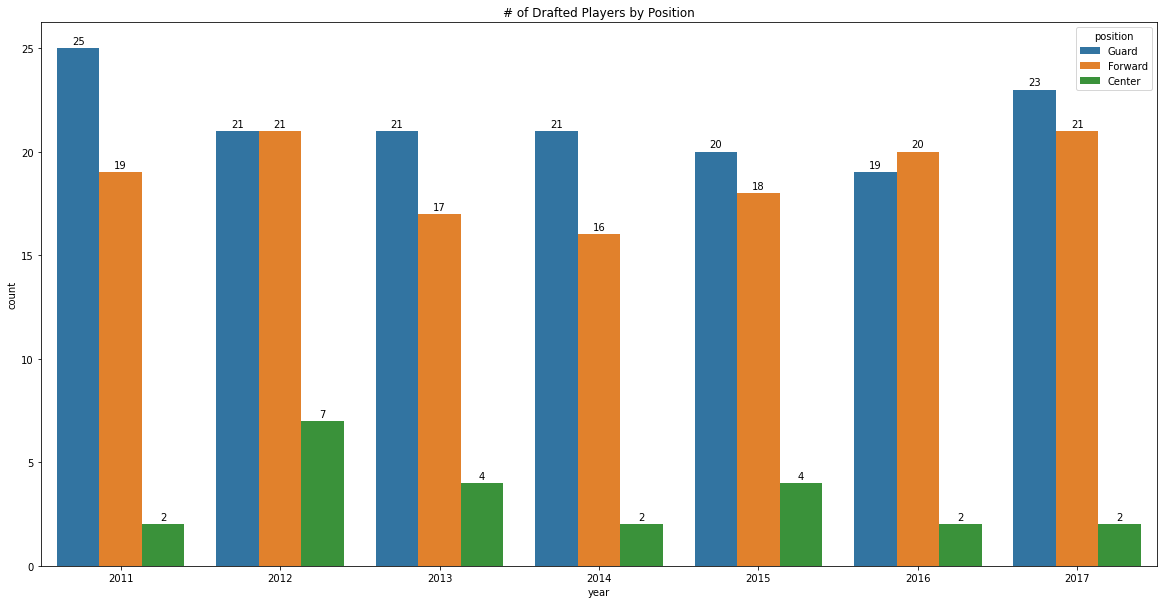

In [47]:
#Countplot of # of player drafted by position ( '11 - '17)

fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x='year',hue='position',data=df[['year','target','position']][(df.target==1)&(df.year >2010)])
ax.set_title('# of Drafted Players by Position')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .2,height ,ha="center")

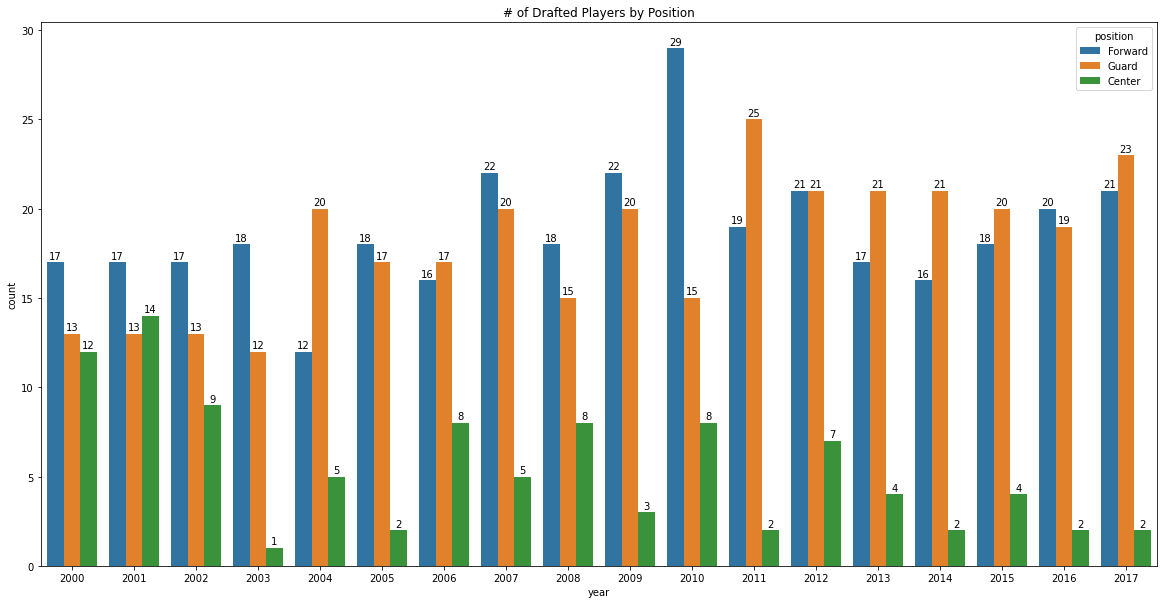

In [48]:
#Countplot of # of player drafted by position ( '11 - '17)

fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x='year',hue='position',data=df[['year','target','position']][df.target==1])
ax.set_title('# of Drafted Players by Position')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .2,height ,ha="center")
    
# save png

plt.savefig('Images/playersdraftedbyposition_yearly')

Of the 31 drafted Centers since 2010, 8 of them are still active in the league. Of the 8, two of them hold a stable rotation on their respective teams as a key player ( Joel Embiid & Andre Drummond ) 

Other Centers:  [Jahlil Okafor,Meyers Leonard,Thomas Bryant,Alex Len,Steven Adams]

In [49]:
df[(df.position =="Center")&(df.target ==1)&(df.year > 2009)].head()

,player_id,name,points,total_rebounds,assists,blocks,steals,true_shooting_percentage,games_played,games_started,three_pointers,two_pointers,weight,height,position,year,target
2388,ekpe-udoh-1,ekpe udoh,867.0,650.0,154.0,292.0,79.0,0.511,103.0,67.0,13.0,330.0,240.0,82.0,Center,2010,1
12445,andre-drummond-1,andre drummond,340.0,257.0,15.0,92.0,28.0,0.509,34.0,30.0,0.0,157.0,270.0,82.0,Center,2012,1
12733,justin-patton-1,justin patton,453.0,218.0,41.0,50.0,30.0,0.671,35.0,34.0,8.0,192.0,215.0,83.0,Center,2017,1
13555,jahlil-okafor-1,jahlil okafor,657.0,322.0,49.0,54.0,29.0,0.641,38.0,38.0,0.0,279.0,270.0,83.0,Center,2015,1
14774,solomon-alabi-1,solomon alabi,704.0,415.0,28.0,159.0,39.0,0.577,77.0,68.0,0.0,270.0,251.0,85.0,Center,2010,1


In [50]:
# Load data of average 3pt makes|attempt of the NBA perseaon
threePA = pd.read_csv('Data/NBA_3PA_perseason.csv')

# Change perseason into single int (e.g 2014-15  to   2015)
threePA['Season'] = threePA['Season'].map(lambda x: 1900 + int(x[5:]) if int(x[5:]) > 20 else int(x[5:]) + 2000)

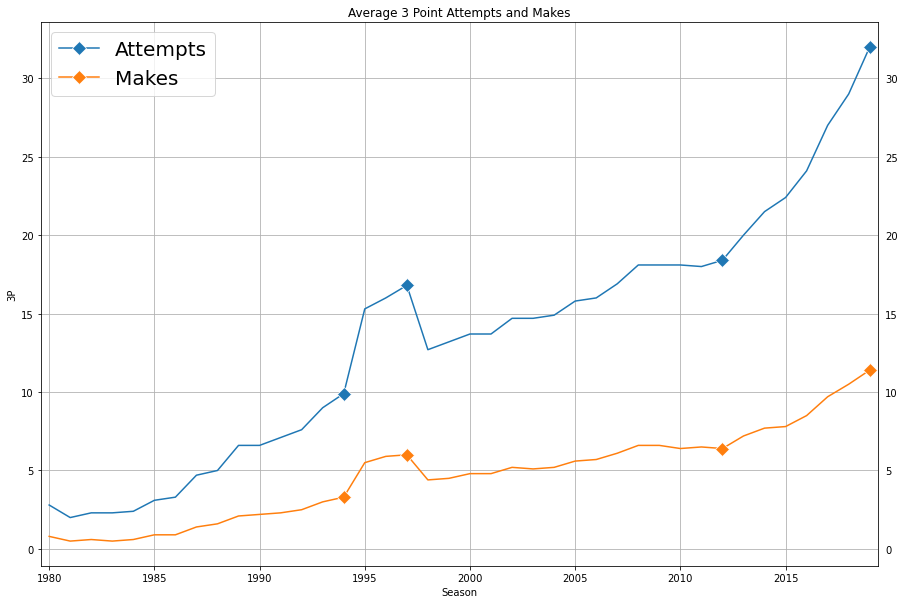

In [51]:
# Line plot of the Avg three point attempts and makes

fig,ax = plt.subplots(figsize=(15,10))
ax.tick_params(labelright=True)

sns.lineplot(x='Season',y='3PA',data=threePA,markevery=[14,17,32,39],marker='D',markersize = 10,ax =ax)
ax.margins(x=0.01)
ax.set_title('Average 3 Point Attempts and Makes')
ax.set_ylabel('Avg. Attempts')
ax.set_xlabel('Season')

sns.lineplot(x='Season',y='3P',data=threePA,markevery=[14,17,32,39],marker='D',markersize = 10)
plt.legend(['Attempts','Makes'],fontsize=20)

plt.grid()
plt.show()

#save png

fig.savefig('Images/Average3pMakesAttempts')

https://clutchpoints.com/brief-time-90s-3-point-line-shorter/

1994 - NBA shorten the 3 point line(22 feet) as a result of below average scores then changed it back because it actually didnt increase scoing averages

1997 - Reverted back to the regular 3-point line (23.9 feet)

Since 2012 the league has average record breaking attempts and made 3-pointer every year and the is no signs of stopping. Due to the evidence of analytics players are given the green light to shoot beyond the arc. Simply put it the 3 is a more efficient shot than the mid-range 2.

https://shottracker.com/articles/a-3-is-worth-more-than-3-the-value-of-floor-spacing

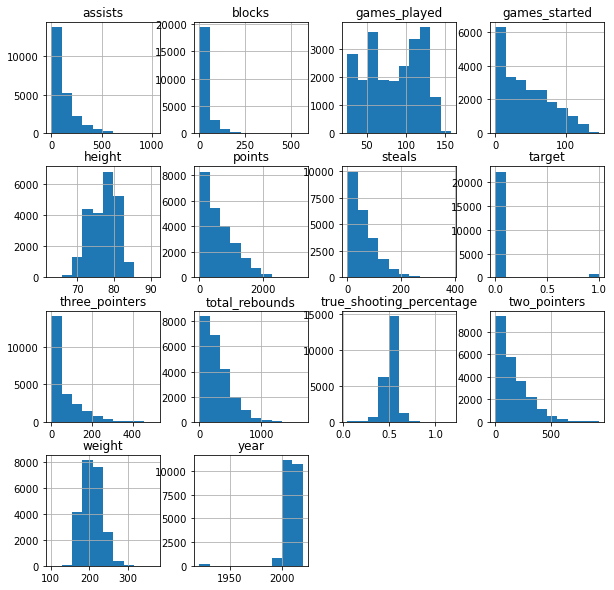

In [52]:
# Check distribution of numerical values
fig = df.hist(figsize=(10,10));

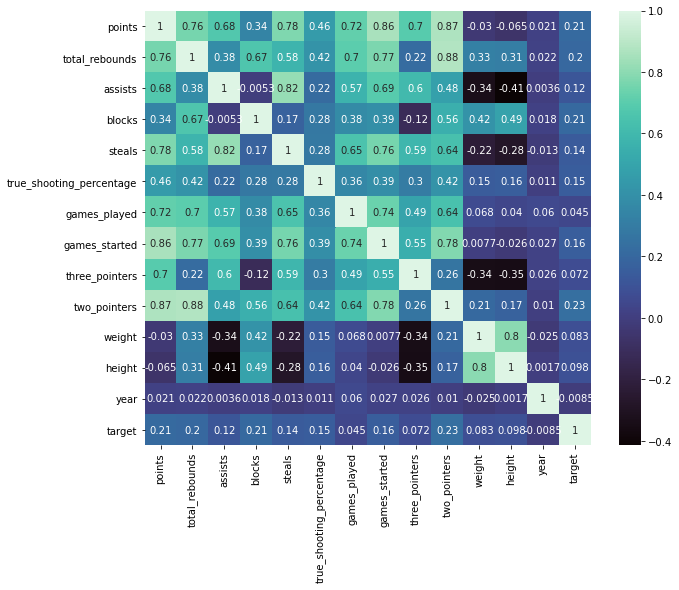

In [53]:
# Checking for correlations

plt.figure(figsize=(10,8))
sns.heatmap(df[feature_cols].corr(),cmap='mako',annot=True)
plt.show();

### Fixing Class imbalance

In [54]:
final = df[['points','total_rebounds','assists','blocks','true_shooting_percentage','weight','height','position','target']]

final = pd.get_dummies(final,drop_first=True)

In [55]:
# Export to csv
final.to_csv('Data/test.csv')

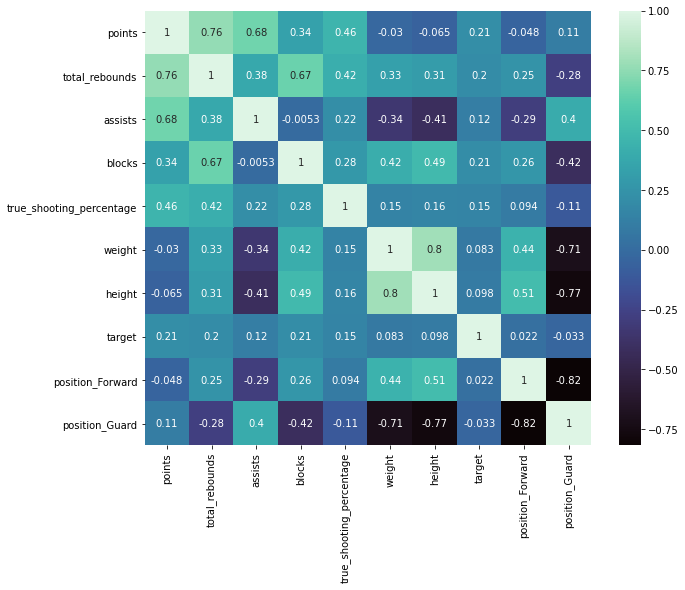

In [56]:
# Checking for correlations

plt.figure(figsize=(10,8))
sns.heatmap(final.corr(),cmap='mako',annot=True)
plt.show();

In [57]:
#shuffle dataframe
shuffled_df = final.sample(frac=1,random_state=4)

# Assign drafted player to drafted_df
drafted_df = shuffled_df.loc[shuffled_df.target ==1]
drafted_df
#Assign n# undrafted players to undrafted_df, equal to length of drafted_df
undrafted_df = shuffled_df.loc[shuffled_df.target == 0].sample(n=len(drafted_df),random_state=42)
undrafted_df

# concat both df
balanced_df = pd.concat([drafted_df,undrafted_df])

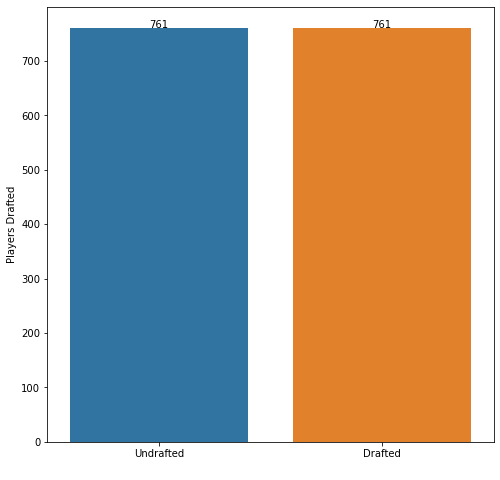

In [58]:
# Barplot of drafted vs undrafted players

plt.figure(figsize=(8,8))
ax = sns.countplot('target',data=balanced_df)
ax.set_xticklabels(['Undrafted','Drafted'])
ax.set_ylabel('Players Drafted')
ax.set_xlabel(' ')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center");

In [59]:
# Export to csv
balanced_df.to_csv('Data/Balanced_df')